# 第二章 预备知识

## 2.1 数据操作

### 2.1.1 入门

In [5]:
import torch
x = torch.arange(12)
x

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [13]:
x.shape # 形状

torch.Size([12])

In [7]:
x.numel() # 元素个数

12

In [8]:
x.reshape(3, 4) # 改变形状

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])

In [9]:
torch.zeros((2, 3, 4)) # 全0

tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])

In [10]:
torch.ones((2, 3, 4)) # 全1

tensor([[[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]],

        [[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]]])

In [11]:
torch.randn(3, 4) # 高斯分布

tensor([[-0.0835,  2.0733,  0.0298,  1.6336],
        [ 1.8124, -0.2002,  1.5069, -0.5463],
        [-0.1115, -1.6234,  1.9531, -0.5209]])

In [12]:
torch.tensor([[2, 1, 4, 3], [1, 2, 3, 4], [4, 3, 2, 1]]) # 赋值

tensor([[2, 1, 4, 3],
        [1, 2, 3, 4],
        [4, 3, 2, 1]])

### 2.1.2 运算符

In [14]:
x = torch.tensor([1.0, 2, 4, 8])
y = torch.tensor([2, 2, 2, 2])
x + y, x - y, x * y, x / y, x ** y # **表示幂运算

(tensor([ 3.,  4.,  6., 10.]),
 tensor([-1.,  0.,  2.,  6.]),
 tensor([ 2.,  4.,  8., 16.]),
 tensor([0.5000, 1.0000, 2.0000, 4.0000]),
 tensor([ 1.,  4., 16., 64.]))

In [15]:
torch.exp(x)

tensor([2.7183e+00, 7.3891e+00, 5.4598e+01, 2.9810e+03])

In [16]:
X = torch.arange(12, dtype=torch.float32).reshape((3, 4))
Y = torch.tensor([[2.0, 1, 4, 3], [1, 2, 3, 4], [4, 3, 2, 1]])
torch.cat((X, Y), dim=0), torch.cat((X, Y), dim=1)

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [ 2.,  1.,  4.,  3.],
         [ 1.,  2.,  3.,  4.],
         [ 4.,  3.,  2.,  1.]]),
 tensor([[ 0.,  1.,  2.,  3.,  2.,  1.,  4.,  3.],
         [ 4.,  5.,  6.,  7.,  1.,  2.,  3.,  4.],
         [ 8.,  9., 10., 11.,  4.,  3.,  2.,  1.]]))

In [17]:
X == Y

tensor([[False,  True, False,  True],
        [False, False, False, False],
        [False, False, False, False]])

In [18]:
X.sum()

tensor(66.)

### 2.1.3 广播机制

在不同形状的张量（n维数组）进行运算时按元素操作
1. 通过适当复制元素来扩展一个或两个数组，以便在转换之后，两个张量具有相同的形状
2. 对生成的数组执行按元素操作

In [19]:
a = torch.arange(3).reshape((3, 1))
b = torch.arange(2).reshape((1, 2))
a, b

(tensor([[0],
         [1],
         [2]]),
 tensor([[0, 1]]))

In [20]:
a + b

tensor([[0, 1],
        [1, 2],
        [2, 3]])

### 2.1.4 索引和切片

In [22]:
X[-1], X[1:3]

(tensor([ 8.,  9., 10., 11.]),
 tensor([[ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.]]))

In [23]:
X[1, 2] = 9
X

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  9.,  7.],
        [ 8.,  9., 10., 11.]])

In [24]:
X[0:2, :] = 12
X

tensor([[12., 12., 12., 12.],
        [12., 12., 12., 12.],
        [ 8.,  9., 10., 11.]])

### 2.1.5 节省内存

In [25]:
before = id(Y)
Y = Y + X
id(Y) == before

False

In [28]:
Z = torch.zeros_like(Y)
print('id(Z): ', id(Z))
Z[:] = X + Y
print('id(Z): ', id(Z))

id(Z):  1910866199008
id(Z):  1910866199008


In [35]:
before = id(X)
X[:] = X + Y
id(X) == before

True

In [36]:
before = id(X)
X += Y
id(X) == before

True

### 2.1.6 转换为其他Python对象

In [37]:
# tensor <-> ndarray (NumPy)
A = X.numpy()
B = torch.tensor(A)
type(A), type(B)

(numpy.ndarray, torch.Tensor)

## 2.2 数据预处理

### 2.2.1 读取数据集

In [1]:
import os

os.makedirs(os.path.join('.', 'data'), exist_ok=True)
data_file = os.path.join('.', 'data', 'house_tiny.csv')
with open(data_file, 'w') as f:
    f.write('NumRooms,Alley,Price\n')
    f.write('NA,Pave,127500\n')
    f.write('2,NA,106000\n')
    f.write('4,NA,178100\n')
    f.write('NA,NA,140000\n')

In [2]:
import pandas as pd

data = pd.read_csv(data_file)
print(data)

   NumRooms Alley   Price
0       NaN  Pave  127500
1       2.0   NaN  106000
2       4.0   NaN  178100
3       NaN   NaN  140000


### 2.2.2 处理缺失值

In [8]:
inputs, outputs = data.iloc[:, 0:2], data.iloc[:, 2]
inputs = inputs.fillna(inputs.mean(numeric_only=True))
print(inputs)

   NumRooms Alley
0       3.0  Pave
1       2.0   NaN
2       4.0   NaN
3       3.0   NaN


In [9]:
inputs = pd.get_dummies(inputs, dummy_na=True)
print(inputs)

   NumRooms  Alley_Pave  Alley_nan
0       3.0        True      False
1       2.0       False       True
2       4.0       False       True
3       3.0       False       True


### 2.2.3 转换为张量格式

In [11]:
import torch

X = torch.tensor(inputs.to_numpy(dtype=float))
y = torch.tensor(outputs.to_numpy(dtype=float))
X, y

(tensor([[3., 1., 0.],
         [2., 0., 1.],
         [4., 0., 1.],
         [3., 0., 1.]], dtype=torch.float64),
 tensor([127500., 106000., 178100., 140000.], dtype=torch.float64))

## 2.3 线性代数

### 2.3.1 标量

In [12]:
import torch

x = torch.tensor(3.0)
y = torch.tensor(2.0)

x + y, x * y, x / y, x ** y

(tensor(5.), tensor(6.), tensor(1.5000), tensor(9.))

### 2.3.2 向量

In [13]:
x = torch.arange(4)
x

tensor([0, 1, 2, 3])

In [14]:
x[3]

tensor(3)

In [15]:
len(x)

4

In [17]:
x.shape

torch.Size([4])

### 2.3.3 矩阵

In [18]:
A = torch.arange(20).reshape(5, 4)
A

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11],
        [12, 13, 14, 15],
        [16, 17, 18, 19]])

In [19]:
A.T

tensor([[ 0,  4,  8, 12, 16],
        [ 1,  5,  9, 13, 17],
        [ 2,  6, 10, 14, 18],
        [ 3,  7, 11, 15, 19]])

In [22]:
B = torch.tensor([[1, 2, 3], [2, 0 ,4], [3, 4, 5]])
B

tensor([[1, 2, 3],
        [2, 0, 4],
        [3, 4, 5]])

In [23]:
B == B.T

tensor([[True, True, True],
        [True, True, True],
        [True, True, True]])

### 2.3.4 张量

In [24]:
X = torch.arange(24).reshape(2, 3, 4)
X

tensor([[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11]],

        [[12, 13, 14, 15],
         [16, 17, 18, 19],
         [20, 21, 22, 23]]])

### 2.3.5 张量算法的基本性质
* 给定具有相同形状的任意两个张量，任何按元素二元运算的结果都将是相同形状的张量
* 将张量乘以或加上一个标量不会改变张量的形状
* 两个矩阵的按元素乘法称为*Hadamard*积

In [25]:
A = torch.arange(20, dtype=torch.float32).reshape(5, 4)
B = A.clone()
A, A + B

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [12., 13., 14., 15.],
         [16., 17., 18., 19.]]),
 tensor([[ 0.,  2.,  4.,  6.],
         [ 8., 10., 12., 14.],
         [16., 18., 20., 22.],
         [24., 26., 28., 30.],
         [32., 34., 36., 38.]]))

In [26]:
A * B

tensor([[  0.,   1.,   4.,   9.],
        [ 16.,  25.,  36.,  49.],
        [ 64.,  81., 100., 121.],
        [144., 169., 196., 225.],
        [256., 289., 324., 361.]])

In [27]:
a = 2
X = torch.arange(24).reshape(2, 3, 4)
a + X, (a * X).shape

(tensor([[[ 2,  3,  4,  5],
          [ 6,  7,  8,  9],
          [10, 11, 12, 13]],
 
         [[14, 15, 16, 17],
          [18, 19, 20, 21],
          [22, 23, 24, 25]]]),
 torch.Size([2, 3, 4]))

### 2.3.6 降维
* 默认情况下，调用求和函数会沿所有的轴降低张量的维度，使它变为一个标量
* 还可以指定张量沿哪一个轴来通过求和降低维度

In [28]:
A_sum_axis0 = A.sum(axis=0)
A, A_sum_axis0, A_sum_axis0.shape

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [12., 13., 14., 15.],
         [16., 17., 18., 19.]]),
 tensor([40., 45., 50., 55.]),
 torch.Size([4]))

In [29]:
A_sum_axis1 = A.sum(axis=1)
A_sum_axis1, A_sum_axis1.shape

(tensor([ 6., 22., 38., 54., 70.]), torch.Size([5]))

In [30]:
A.sum(axis=[0, 1]) # 等价于A.sum()

tensor(190.)

* 求平均值

In [31]:
A.mean(), A.sum() / A.numel()

(tensor(9.5000), tensor(9.5000))

* 非降维求和，保持轴数不变可以利用广播机制

In [33]:
sum_A = A.sum(axis=1, keepdims=True)
sum_A

tensor([[ 6.],
        [22.],
        [38.],
        [54.],
        [70.]])

In [34]:
A / sum_A

tensor([[0.0000, 0.1667, 0.3333, 0.5000],
        [0.1818, 0.2273, 0.2727, 0.3182],
        [0.2105, 0.2368, 0.2632, 0.2895],
        [0.2222, 0.2407, 0.2593, 0.2778],
        [0.2286, 0.2429, 0.2571, 0.2714]])

* 使用cumsum函数非降维求和

In [35]:
A.cumsum(axis=0)

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  6.,  8., 10.],
        [12., 15., 18., 21.],
        [24., 28., 32., 36.],
        [40., 45., 50., 55.]])

### 2.3.7 点积（Dot Product）

In [39]:
x = torch.arange(4, dtype=torch.float32)
y = torch.ones(4, dtype=torch.float32)
x, y, torch.dot(x, y), (x * y).sum(), torch.sum(x * y)

(tensor([0., 1., 2., 3.]),
 tensor([1., 1., 1., 1.]),
 tensor(6.),
 tensor(6.),
 tensor(6.))

### 2.3.8 矩阵-向量积

In [42]:
A.shape, x.shape, torch.mv(A, x)

(torch.Size([5, 4]), torch.Size([4]), tensor([ 14.,  38.,  62.,  86., 110.]))

### 2.3.9 矩阵-矩阵乘法

In [43]:
B = torch.ones(4, 3)
torch.mm(A, B)

tensor([[ 6.,  6.,  6.],
        [22., 22., 22.],
        [38., 38., 38.],
        [54., 54., 54.],
        [70., 70., 70.]])

### 2.3.10 范数（norm）
**定义**
* 目标，或许是深度学习算法最重要的组成部分（除了数据），通常被表达为范数
* 非正式地说，向量的范数**表示一个向量有多大**
* 在线性代数中，向量范数是**将向量映射到标量**的函数$f$

**性质**
1. 如果按常数因子$\alpha$缩放向量的所有元素，其范数也会按相同常数因子的绝对值缩放
   $$f({\alpha}\textbf{x})=|\alpha|f(\textbf{x})$$
2. 三角不等式
   $$f(\textbf{x}+\textbf{y}){\leq}f(\textbf{x})+f(\textbf{y})$$
3. 范数必须是非负的
   $$f(\textbf{x})\geq0$$

**常见向量范数**
* $L_1范数$
  $$||\textbf{x}||_1=\sum\limits_{i=1}^{n}|x_i|$$
* $L_2范数$ - 深度学习常用，常省略下标2
  $$||\textbf{x}||=||\textbf{x}||_2=\sqrt{\sum\limits_{i=1}^{n}{x_i}^2}$$
* $L_p范数$ - 更一般
  $$||\textbf{x}||_p=(\sum\limits_{i=1}^{n}|x_i|^p)^{1/p}$$

**矩阵范数 - Frobenius范数**
* 类似向量的$L_2$范数
  $$||\textbf{X}||_F=\sqrt{\sum\limits_{i=1}^{m}\sum\limits_{j=1}^{n}x_{ij}^2}$$

In [50]:
u = torch.tensor([3.0, -4.0])
torch.abs(u).sum() # L1范数

tensor(7.)

In [49]:
torch.norm(u) # L2范数

tensor(5.)

In [51]:
torch.norm(torch.ones((4, 9)))

tensor(6.)

## 2.4 微积分

### 2.4.1 导数和微分

In [1]:
# 逼近法求导

%matplotlib inline
import numpy as np
from matplotlib_inline import backend_inline
from d2l import torch as d2l

def f(x):
    return 3 * x ** 2 - 4 * x

def numerical_lim(f, x, h):
    return (f(x + h) - f(x)) / h

h = 0.1
for i in range(5):
    print(f'h={h:.5f}, numerical limit={numerical_lim(f, 1, h):.5f}')
    h *= 0.1

h=0.10000, numerical limit=2.30000
h=0.01000, numerical limit=2.03000
h=0.00100, numerical limit=2.00300
h=0.00010, numerical limit=2.00030
h=0.00001, numerical limit=2.00003


In [3]:
def use_svg_display(): #@save
    """使用svg格式在Jupyter中显示绘图"""
    backend_inline.set_matplotlib_formats('svg')

def set_figsize(figsize=(3.5, 2.5)): #@save
    """设置matplotlib的图表大小"""
    use_svg_display()
    d2l.plt.rcParams['figure.figsize'] = figsize

#@save
def set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend):
    """设置matplotlib的轴"""
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel)
    axes.set_xscale(xscale)
    axes.set_yscale(yscale)
    axes.set_xlim(xlim)
    axes.set_ylim(ylim)
    if legend:
        axes.legend(legend)
    axes.grid()

#@save
def plot(X, Y=None, xlabel=None, ylabel=None, legend=None, xlim=None, ylim=None, xscale='linear', yscale='linear', fmts=('-', 'm--', 'g-.', 'r:'), figsize=(3.5, 2.5), axes=None):
    """绘制数据点"""
    if legend is None:
        legend = []
    set_figsize(figsize)
    axes = axes if axes else d2l.plt.gca()

    # 如果X有一个轴，输出True
    def has_one_axis(X):
        return (hasattr(X, "ndim") and X.ndim == 1 or isinstance(X, list) and not hasattr(X[0], "__len__"))

    if has_one_axis(X):
        X = [X]
    if Y is None:
        X, Y = [[]] * len(X), X
    elif has_one_axis(Y):
        Y = [Y]
    if len(X) != len(Y):
        X = X * len(Y)
    axes.cla()
    for x, y, fmt in zip(X, Y, fmts):
        if len(x):
            axes.plot(x, y, fmt)
        else:
            axes.plot(y, fmt)
    set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend)

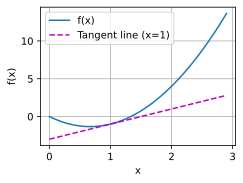

In [4]:
x = np.arange(0, 3, 0.1)
plot(x, [f(x), 2 * x - 3], 'x', 'f(x)', legend=['f(x)', 'Tangent line (x=1)'])

### 2.4.2 偏导数

### 2.4.3 梯度
**定义**
* 连结一个多元函数对其所有变量的偏导数，得到该函数的梯度（gradient）向量。
* 设函数$f: \mathbb{R}^n\rightarrow\mathbb{R} $的输入是一个$n$维向量$\textbf{x}=[x_1,x_2,...,x_n]^\text{T}$，并且输出是一个标量。函数$f(\textbf{x})$相对于$\textbf{x}$的梯度是一个包含$n$个偏导数的向量：
$$\nabla_\textbf{x}f(\textbf{x})=[\frac{\partial{f(\textbf{x})}}{\partial{x_1}},\frac{\partial{f(\textbf{x})}}{\partial{x_2}},...,\frac{\partial{f(\textbf{x})}}{\partial{x_n}}]^\text{T}$$
  * $\nabla_\textbf{x}f(\textbf{x})$通常在没有歧义时被$\nabla{f(\textbf{x})}$取代

**一些规则**
* 对于$n$维向量$\textbf{x}$
    * 对于所有$\textbf{A}\in\mathbb{R}^{m \times n}$，都有$\nabla_\textbf{x}\textbf{Ax}=\textbf{A}^\text{T}$
    * 对于所有$\textbf{A}\in\mathbb{R}^{n \times m}$，都有$\nabla_\textbf{x}\textbf{x}^\text{T}\textbf{A}=\textbf{A}$
    * 对于所有$\textbf{A}\in\mathbb{R}^{n \times n}$，都有$\nabla_\textbf{x}\textbf{x}^\text{T}\textbf{Ax}=(\textbf{A}+\textbf{A}^\text{T})\textbf{x}$
    * $\nabla_\textbf{x}||\textbf{x}||^2=\nabla_\textbf{x}\textbf{x}^\text{T}\textbf{x}=2\textbf{x}$
* 对于任何矩阵$\textbf{X}$，都有$\nabla_\textbf{X}||\textbf{X}||^2_F=2\textbf{X}$

### 2.4.4 链式法则
* 单变量 $y=f(u)$，$u=g(x)$
  $$\frac{dy}{dx}=\frac{dy}{du}\frac{du}{dx}$$
* 多变量 可微分函数$y$有变量$u_1,u_2,...,u_m$，其中每个可微分函数$u_i$都有变量$x_1,x_2,...,x_n$
  $$\frac{\partial{y}}{\partial{x_i}}=\frac{\partial{y}}{\partial{u_1}}\frac{\partial{u_1}}{\partial{x_i}}+\frac{\partial{y}}{\partial{u_2}}\frac{\partial{u_2}}{\partial{x_i}}+...+\frac{\partial{y}}{\partial{u_m}}\frac{\partial{u_m}}{\partial{x_i}}$$

## 2.5 自动微分